In [1]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [3]:
datos = pd.read_csv("/content/data/datos_3dsv.zip")


In [ ]:
datos.head()

tipo  presion_alterial_alta  colesterol_alto   imc  enfermedad_cardiaca  \
0   0.0                    1.0              1.0  40.0                  0.0   
1   0.0                    0.0              0.0  25.0                  0.0   
2   0.0                    1.0              1.0  28.0                  0.0   
3   0.0                    1.0              0.0  27.0                  0.0   
4   0.0                    1.0              1.0  24.0                  0.0   

   hace_ejercicio  come_fruta  come_vegetales  edad  dificultad_caminar  \
0             0.0         0.0             1.0   9.0                 1.0   
1             1.0         0.0             0.0   7.0                 0.0   
2             0.0         1.0             0.0   9.0                 1.0   
3             1.0         1.0             1.0  11.0                 0.0   
4             1.0         1.0             1.0  11.0                 0.0   

   genero  fuma  
0     0.0   1.0  
1     0.0   1.0  
2     0.0   0.0  
3     0.0   0.0  
4     0.0   0.0

In [4]:
datos.shape

(250717, 12)

Nota:
Pero si quieres tener un solo número global, se usan estos tipos de promedios,

Macro promedio (macro average) (Promedio de especificidades)
Calcula la métrica para cada clase individualmente.
Luego hace el promedio simple de todas las clases, sin importar cuántas instancias hay de cada clase.

Micro promedio (micro average)
Suma todos los verdaderos positivos, falsos positivos, etc. de todas las clases juntas, y luego calcula la métrica.
Pesa más las clases con más ejemplos.
Es útil para medir el desempeño general del modelo, especialmente cuando las clases están desbalanceadas.

Promedio ponderado (weighted average)
Calcula la métrica para cada clase.
Luego hace un promedio ponderado según cuántas instancias hay en cada clase.

# Modelo 1


In [5]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7) #aca se hacen todas las particiones
#70%   , 30%   , 80%    , 20%
#siendo 70 y 80 datos de entrenamiento y 30 y 20 datos de testeo

In [6]:
'''Acá se está creando un modelo de regresión logística utilizando LogisticRegression de la biblioteca scikit-learn.
max_iter=1000: Estableces el número máximo de iteraciones para que el modelo pueda converger (es decir, encontrar los mejores coeficientes para los datos). Esto es útil si tienes un conjunto de datos complejo o grandes cantidades de datos.'''
model = LogisticRegression(max_iter=1000)#esa cantidad de iteraciones son las famosas epocas.


In [7]:
model.fit(X_train,y_train) #aca entrenamos el modelo

LogisticRegression(max_iter=1000)

In [8]:
'''Utilizar el modelo entrenado (model) para predecir las etiquetas (tipo) para el conjunto de datos de prueba (X_test).
Genera un array (y_predict) que contiene las predicciones del modelo (0,1,2), basado en las características presentes en X_test.'''
y_predict = model.predict(X_test)

The accuracy of Logistic Regression is 0.8484


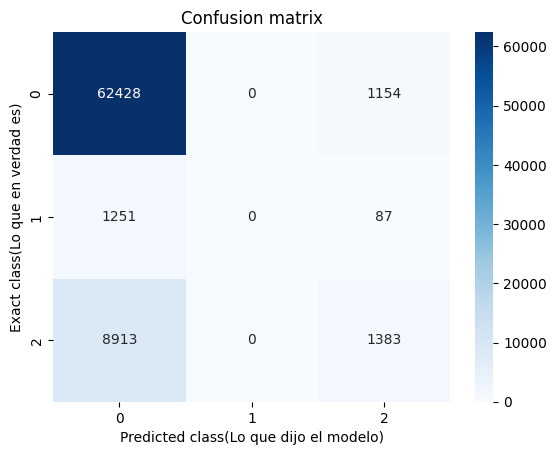

In [9]:
#evaluación del modelo
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))


confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class(Lo que dijo el modelo)')
plt.ylabel('Exact class(Lo que en verdad es)');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

In [10]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8483700276536907

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     63582
         1.0       0.00      0.00      0.00      1338
         2.0       0.53      0.13      0.21     10296

    accuracy                           0.85     75216
   macro avg       0.46      0.37      0.38     75216
weighted avg       0.80      0.85      0.80     75216

Specificity for class 0: 0.1264
Specificity for class 1: 1.0000
Specificity for class 2: 0.9809



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Aunque este modelo alcanza un **accuracy alto (84.8%)**, su rendimiento está fuertemente **sesgado hacia la clase 0**, que domina en las predicciones con un F1-score de 0.92 y un recall de 98%. Sin embargo, **la clase 1 está completamente ignorada** (recall y F1 = 0.00) y la clase 2 tiene bajo desempeño (recall = 13%, F1 = 0.21). Las **especificidades de clases 1 y 2 son altas** porque el modelo casi nunca predice esas clases, mientras que la **especificidad de la clase 0 es muy baja (12.6%)**, lo que indica que muchas instancias se están clasificando erróneamente como clase 0. En resumen, este modelo es **muy preciso solo en la clase mayoritaria**, pero **inservible si se necesita identificar clases minoritarias**.

# Modelo 2


In [11]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [12]:
model = KNeighborsClassifier() #con esto basta para entrenar el modelo gracias a sklearn
model.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 0.8314


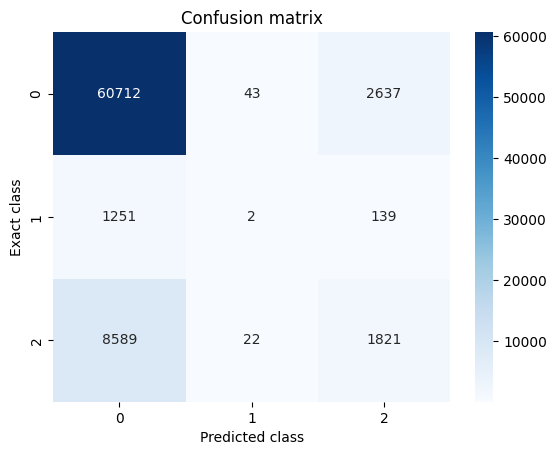

In [14]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

In [15]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8314055520102106

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     63392
         1.0       0.03      0.00      0.00      1392
         2.0       0.40      0.17      0.24     10432

    accuracy                           0.83     75216
   macro avg       0.43      0.38      0.38     75216
weighted avg       0.78      0.83      0.80     75216

Specificity for class 0: 0.1678
Specificity for class 1: 0.9991
Specificity for class 2: 0.9571



Este modelo presenta un **accuracy del 83.1%**, pero su rendimiento es claramente **desequilibrado**: predice muy bien la clase 0 (recall = 96%, F1 = 0.91), pero **prácticamente ignora la clase 1** (recall = 0.00, F1 = 0.00) y tiene bajo desempeño en la clase 2 (recall = 17%, F1 = 0.24). El **macro F1-score es de solo 0.38**, lo que indica que, si se consideran todas las clases por igual, el modelo tiene un rendimiento deficiente. Las **especificidades** elevadas para clases 1 y 2 se deben a que casi no se predicen, mientras que la **clase 0 tiene una especificidad baja (16.8%)**, mostrando que muchas instancias se clasifican erróneamente como clase 0. En resumen, el modelo es efectivo únicamente para la clase dominante y necesita ajustes importantes si se requiere una clasificación justa entre clases.

# Modelo 3

In [16]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.8185


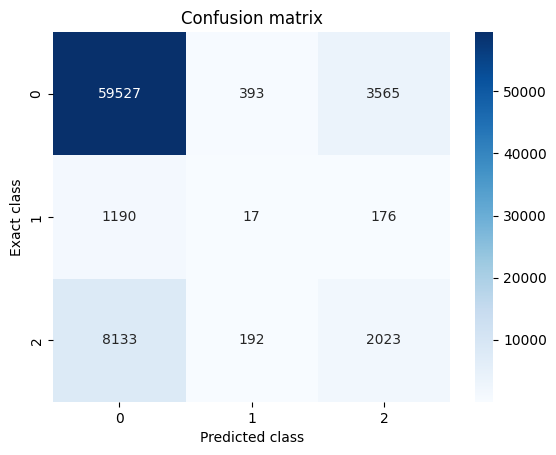

In [19]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [20]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8185359497979153

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     63485
         1.0       0.03      0.01      0.02      1383
         2.0       0.35      0.20      0.25     10348

    accuracy                           0.82     75216
   macro avg       0.41      0.38      0.39     75216
weighted avg       0.78      0.82      0.79     75216

Specificity for class 0: 0.2053
Specificity for class 1: 0.9921
Specificity for class 2: 0.9423



Este modelo alcanza un **accuracy del 81.8%**, pero presenta un **alto desbalance en el rendimiento por clase**. La clase 0 domina claramente (recall = 94%, F1 = 0.90), mientras que la clase 1 es prácticamente ignorada (recall = 1%, F1 = 0.02) y la clase 2 tiene un desempeño bajo (recall = 20%, F1 = 0.25). El **macro F1-score es de solo 0.39**, lo que refleja un rendimiento general pobre si se consideran todas las clases por igual. Además, la **especificidad de la clase 0 es baja (20.5%)**, lo que indica que muchas instancias de otras clases están siendo clasificadas erróneamente como clase 0. En resumen, este modelo **funciona casi exclusivamente para la clase mayoritaria**, siendo inadecuado si se necesita una clasificación justa entre las tres categorías.

# Modelo 4

In [21]:
pip install xgboost

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [22]:
X = datos.drop("tipo", axis=1)
y = datos["tipo"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [25]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # evita warnings
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.8481


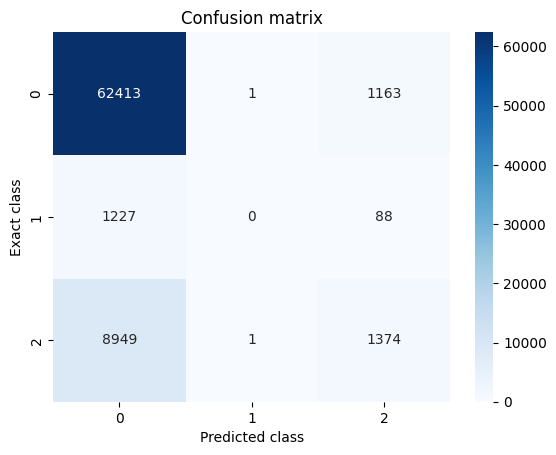

In [27]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [28]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8480509466071049

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     63577
         1.0       0.00      0.00      0.00      1315
         2.0       0.52      0.13      0.21     10324

    accuracy                           0.85     75216
   macro avg       0.46      0.37      0.38     75216
weighted avg       0.80      0.85      0.80     75216

Specificity for class 0: 0.1257
Specificity for class 1: 1.0000
Specificity for class 2: 0.9807



Este modelo, a pesar de tener un **accuracy alto (84.8%)**, muestra un desempeño **desequilibrado y engañoso**. La **clase 0** domina por completo las predicciones (recall = 98%, F1 = 0.92), mientras que la **clase 1 está completamente ignorada** (recall y F1 = 0.00), y la **clase 2 tiene un rendimiento muy bajo** (recall = 13%, F1 = 0.21). El **macro F1-score de 0.38** refleja este mal balance, ya que considera todas las clases por igual. Además, la **especificidad baja para la clase 0 (12.6%)** indica que muchas instancias de otras clases están siendo clasificadas erróneamente como clase 0. En resumen, aunque el modelo parece bueno por su accuracy, **no es confiable para tareas donde importa detectar correctamente las clases minoritarias**.